In [2]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

# 8.3.1 Fitting Classification Trees

In [4]:
carseats = pd.read_csv('../datasets/Carseats.csv', index_col=0)
carseats['High'] = (carseats['Sales'] > 8).map({True: 'Yes', False: 'No'})
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']] = \
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']].apply(pd.Categorical)

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

X = carseats.loc[:, 'CompPrice':'US']
y = carseats.loc[:, 'High']

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_carseats = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats.fit(X, y)
y_pred = tree_carseats.predict(X)

tree_carseats.score(X, y)

0.8775

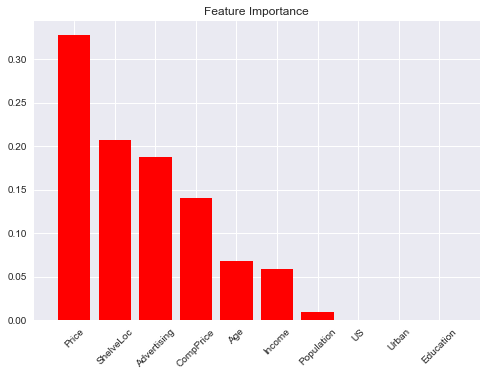

In [7]:
# Feature Importance

# (pd
#  .DataFrame({'Importance': tree_carseats.feature_importances_ * 100}, index=X.columns)
#  .sort_values('Importance', ascending=True, axis=0)
#  .plot(kind='barh', title='Feature Importance'));

from scikitplot.estimators import plot_feature_importances

plot_feature_importances(tree_carseats, 
                         feature_names=X.columns,
                         x_tick_rotation=45);

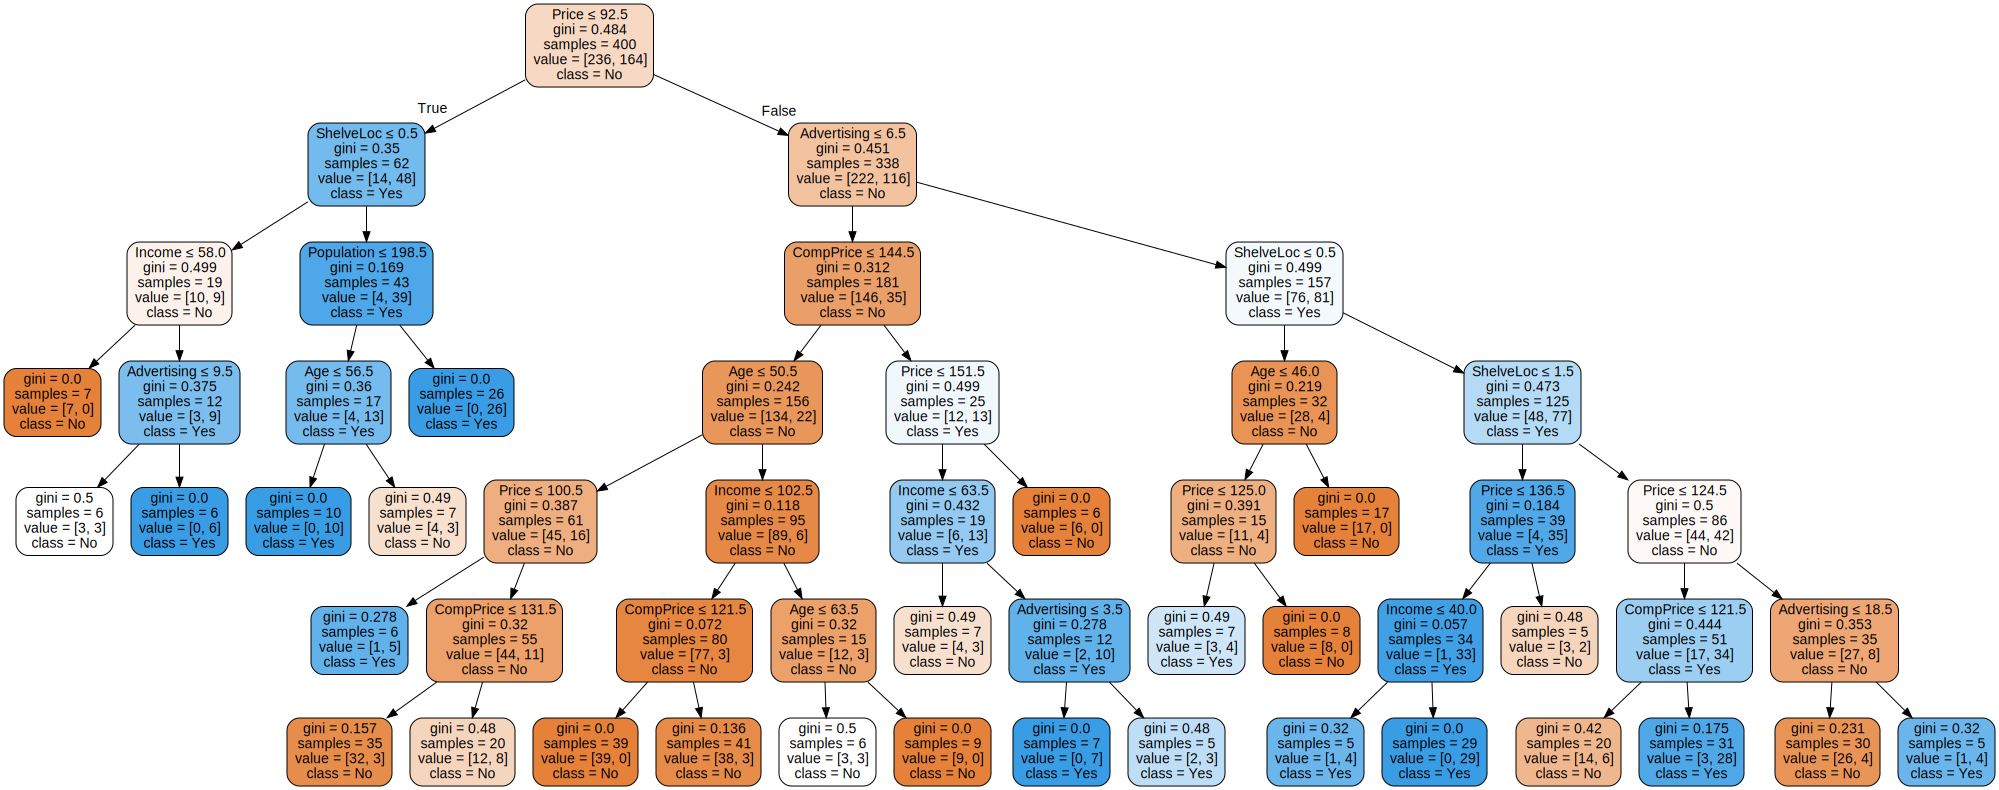

In [8]:
from graphviz import Source

tree_carseats_graph = export_graphviz(tree_carseats, 
                                      out_file=None, 
                                      feature_names=X.columns,
                                      class_names=tree_carseats.classes_,
                                      filled=True, 
                                      rounded=True,  
                                      special_characters=True)

Source(tree_carseats_graph)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [10]:
tree_carseats_tt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats_tt.fit(X_train, y_train)
y_pred = tree_carseats_tt.predict(X_test)

tree_carseats_tt.score(X_train, y_train), tree_carseats_tt.score(X_test, y_test)

(0.9, 0.73)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.71      0.75       117
         Yes       0.65      0.76      0.70        83

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



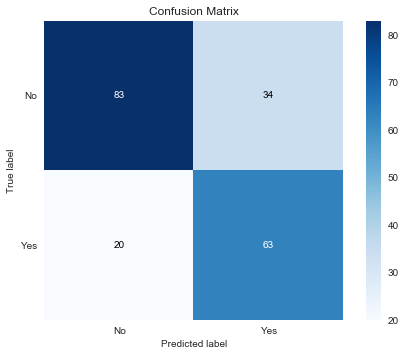

In [12]:
# from sklearn.metrics import confusion_matrix, accuracy_score

# pd.DataFrame(confusion_matrix(y_test, y_pred), index=['No', 'Yes'], columns=['No', 'Yes'])

from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test, y_pred);#Slightly different with R

# 8.3.2 Fitting Regression Trees

In [13]:
boston = pd.read_csv('../datasets/Boston.csv', index_col=0)

X = boston.loc[:, 'crim':'lstat']
y = boston.loc[:, 'medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_boston = DecisionTreeRegressor(min_samples_leaf=5, max_depth=2)
tree_boston.fit(X_train, y_train)
y_pred = tree_boston.predict(X_test)

tree_boston.score(X_train, y_train), tree_boston.score(X_test, y_test)

(0.7461422238084277, 0.6349503884695384)

In [15]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

29.616571536918574

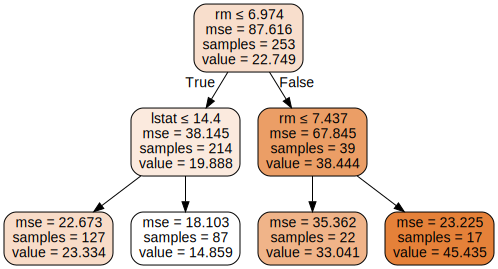

In [16]:
tree_boston_graph = export_graphviz(tree_boston, 
                                    out_file=None, 
                                    feature_names=X.columns,
                                    filled=True, 
                                    rounded=True,  
                                    special_characters=True)

Source(tree_boston_graph)

# 8.3.3 Bagging and Random Forests

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

boston_bag = RandomForestRegressor(max_features=13, random_state=42)
boston_bag.fit(X_train, y_train)

y_pred = boston_bag.predict(X_test)

mean_squared_error(y_test, y_pred)

14.332307616600787

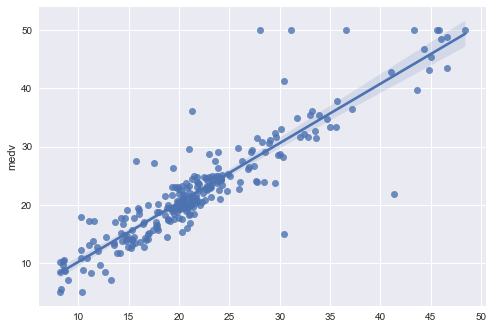

In [18]:
sns.regplot(y_pred, y_test);

In [19]:
boston_rf = RandomForestRegressor(max_features=6, random_state=42, n_estimators=100)
boston_rf.fit(X_train, y_train)

y_pred = boston_rf.predict(X_test)

mean_squared_error(y_test, y_pred)

13.359148822134387

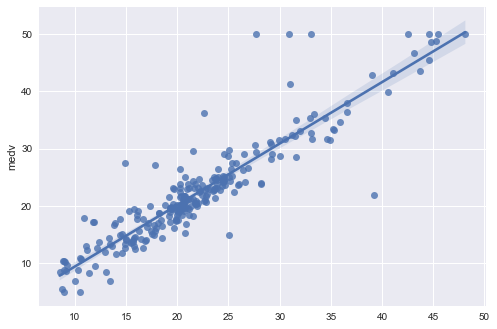

In [20]:
sns.regplot(y_pred, y_test);

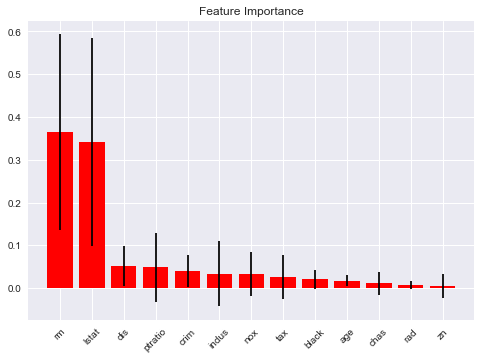

In [21]:
# Feature Importance

plot_feature_importances(boston_rf, 
                         feature_names=X.columns,
                         x_tick_rotation=45);

# 8.3.4 Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

boston_gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)
boston_gb.fit(X_train, y_train)

y_pred = boston_gb.predict(X_test)

mean_squared_error(y_test, y_pred)

16.770864624119454

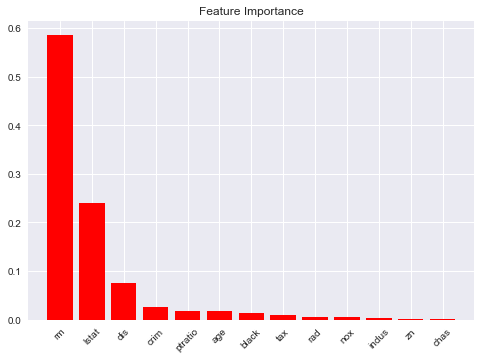

In [23]:
plot_feature_importances(boston_gb, 
                         feature_names=X.columns,
                         x_tick_rotation=45);

/Users/hanyuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/Users/hanyuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/Users/hanyuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.wa

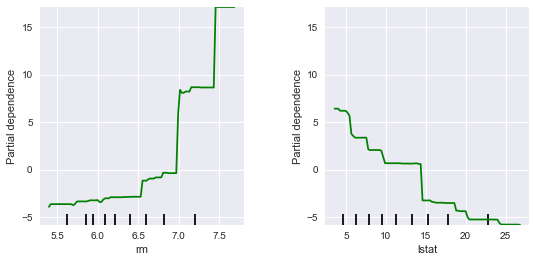

In [24]:
# Partial Dependence Plots

from sklearn.ensemble.partial_dependence import plot_partial_dependence

plot_partial_dependence(boston_gb, X_train, [5, 12], feature_names=X.columns);

In [25]:
boston_gb2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=4, random_state=42)
boston_gb2.fit(X_train, y_train)

y_pred = boston_gb2.predict(X_test)

mean_squared_error(y_test, y_pred)

15.276392930363572

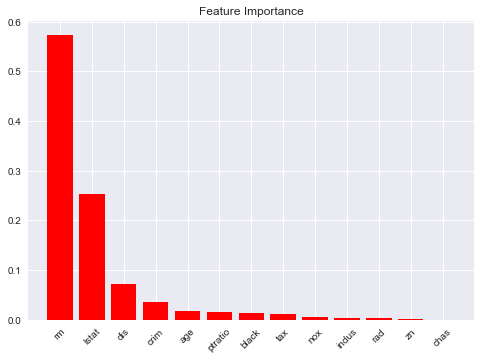

In [26]:
plot_feature_importances(boston_gb2, 
                         feature_names=X.columns,
                         x_tick_rotation=45);